In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15098677950606548178
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12394344124822095710
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

載入檔案

In [ ]:
import os
if (not os.path.isdir("已分類垃圾")):
    os.system("gdown https://drive.google.com/uc?id=1eTMU44txJ6rMJpASQl17qW9qyNPWczvt")
    os.system("unzip 已分類垃圾.zip")

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(input_dir, output_dir, val_ratio=0.2):
    # 確保目標目錄存在
    os.makedirs(output_dir, exist_ok=True)

    # 遍歷每個類別
    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)
        if not os.path.isdir(class_path):
            continue  # 跳過非資料夾的項目

        # 獲取該類別中的所有圖片檔案
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

        # 分割為訓練集和驗證集
        train_images, val_images = train_test_split(images, test_size=val_ratio, random_state=42)

        # 創建訓練和驗證目錄
        train_dir = os.path.join(output_dir, "train", class_name)
        val_dir = os.path.join(output_dir, "val", class_name)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)

        # 複製圖片到對應目錄
        for img in train_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, img))
        for img in val_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, img))

    print("數據集分割完成！")

# 使用範例
input_dir = "已分類垃圾"  # 原始數據集目錄
output_dir = "已分類垃圾(已分割)"  # 分割後的目錄

split_dataset(input_dir, output_dir)


數據集分割完成！


In [ ]:
base_dir = '已分類垃圾(已分割)'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'val')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 設定資料增強與重新縮放
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # 將像素值縮放到 [0, 1]
    shear_range=10,       # 隨機應用剪切變換
    zoom_range=0.2,       # 隨機縮放
    horizontal_flip=True  # 隨機水平翻轉
)

# 建立訓練集生成器
train_set = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),   # 調整圖片大小
    batch_size=10,          # 批次大小
    class_mode="categorical"  # 使用多類別分類（由於有八個類別）
)

# 建立驗證集生成器
val_set = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),   # 調整圖片大小
    batch_size=10,          # 批次大小
    class_mode="categorical"  # 使用多類別分類
)

Found 12850 images belonging to 8 classes.
Found 12850 images belonging to 8 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_set = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=10,
    class_mode="categorical")

Found 3215 images belonging to 8 classes.


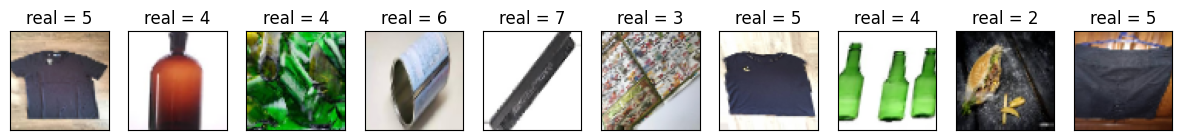

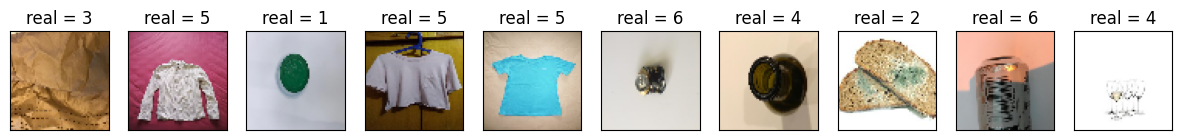

In [ ]:
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")
# Validate the Success of Image Loading
import HappyML.model_drawer as md

# Print the first 10 images of Training Set
for data, label in train_set:
    md.show_first_n_images(x_ary=data, y_real=np.argmax(label, axis=1), first_n=10, font_size=12)
    break

# Print the first 10 images of Testing Set
for data, label in test_set:
    md.show_first_n_images(x_ary=data, y_real=np.argmax(label, axis=1), first_n=10, font_size=12)
    break

In [ ]:
print("訓練集類別索引：", train_set.class_indices)
print("驗證集類別索引：", val_set.class_indices)
print("測試集類別索引：", test_set.class_indices)


訓練集類別索引： {'一般 general': 0, '塑膠 plastic': 1, '廚餘 food_waste': 2, '廢紙 waste_paper': 3, '玻璃 glass': 4, '衣服類 clothes (Textiles)': 5, '鐵鋁金屬 iron alumium': 6, '電池類 battery': 7}
驗證集類別索引： {'一般 general': 0, '塑膠 plastic': 1, '廚餘 food_waste': 2, '廢紙 waste_paper': 3, '玻璃 glass': 4, '衣服類 clothes (Textiles)': 5, '鐵鋁金屬 iron alumium': 6, '電池類 battery': 7}
測試集類別索引： {'一般 general': 0, '塑膠 plastic': 1, '廚餘 food_waste': 2, '廢紙 waste_paper': 3, '玻璃 glass': 4, '衣服類 clothes (Textiles)': 5, '鐵鋁金屬 iron alumium': 6, '電池類 battery': 7}


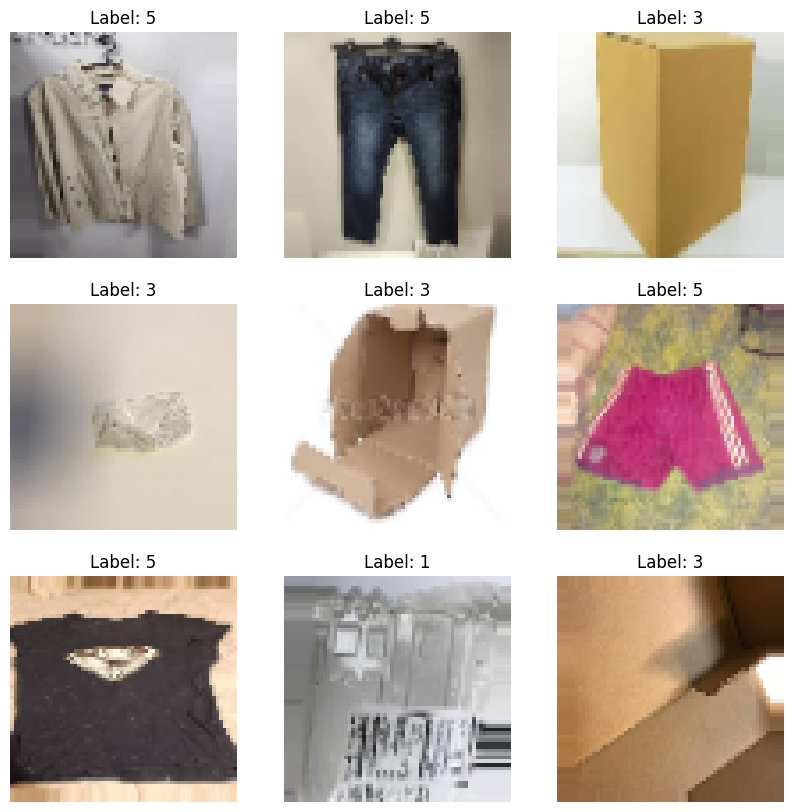

In [ ]:
# 從訓練集隨機取一批圖片
images, labels = next(train_set)

# 顯示圖片
plt.figure(figsize=(10, 10))
for i in range(9):  # 顯示前9張圖片
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {np.argmax(labels[i])}")
    plt.axis("off")
plt.show()